***
# Final Project Name: 
## Finding best suited playing position on the field based on the football player's attributes.

![alt text](https://www.trueachievements.com/customimages/086283.jpg)

***
## Step 1: Import the dataset and necessary packages

***
### Import packages:  

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

***
### Overview of the Dataset used:

In [2]:
%matplotlib inline
# Read in the dataset
fifa = pd.read_csv("input/data.csv")   #read the data into a dataframe
fifa.head() #print first 5 rows of the data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#fifa.info()

In [4]:
fifa.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


***
## Step 2: Data Preprocessing

***
### Selecting the columns we want to use:

#### _Note: Dropping all the Goal Keeper records and attributes because they have totally different attributes as compared to players in other positions._

In [5]:
#choosing column attributes related to attackers, midfielders and defenders
df2 = fifa.loc[:, 'Crossing':'Release Clause']
df1 = fifa[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Skill Moves', 'Position', 'Height', 'Weight']]
df3 = pd.concat([df1, df2], axis=1) #concat along the rows
df = df3.drop(['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1) #dropping gk attributes
df = df.loc[df['Position'] != 'GK', :] #removing gk records

***
### Dropping all the null values in the dataframe:

In [6]:
df = df.dropna()

***
### Converting string data to numerical data:

#### _In order perform the data analysis, we convert the string values into numerical values._

In [7]:
def value_to_int(df_value):
    try:
        value = df_value.str[1:-1].astype(float) #[1:-1] to remove the euro symbol at the start and 'M' or 'K' at the end
        #print(value)
        #value = float(df_value[1:-1]) #[start_index : end_index - 1]
        suffix = df_value.str[-1:]
        #print(suffix)
        #suffix = df_value[-1:]

#converting millions(M){player release clause and value} and thousands(K){player wages} to figures        
        row_count = 0
        while(row_count < value.shape[0]):   #shape[0] denotes no.of.rows
            if suffix.iloc[row_count] == 'M':
                value.iloc[row_count] = value.iloc[row_count] * 1000000
            elif suffix.iloc[row_count] == 'K':
                value.iloc[row_count] = value.iloc[row_count] * 1000
            row_count+=1
    except ValueError:
        value = 0
    #print(value)    
    return value
  
df['Value_float'] = value_to_int(df['Value'])
#print(df['Value_float'])
#df['Value_float'] = df['Value'].apply(value_to_int)
df['Wage_float'] = value_to_int(df['Wage'])
#print(df['Wage_float'])
#df['Wage_float'] = df['Wage'].apply(value_to_int)
df['Release_Clause_float'] = value_to_int(df['Release Clause'])
#df['Release_Clause_float'] = df['Release Clause'].apply(value_to_int)
#print(df['Release_Clause_float'])

In [8]:
def weight_to_int(df_weight):
    value = df_weight.str[:-3].astype(int)
    #print(type(df_weight))
    #value = int(df_weight[:-3])   #removing lbs from column value and converting to int
    return value
  
df['Weight_int'] = weight_to_int(df['Weight'])
#df['Weight_int'] = df['Weight'].apply(weight_to_int)
#df['Weight_int'] = df['Weight_int'].apply(lambda x: int(x))

In [9]:
def height_to_int(df_height):
    try:
        feet = int(df_height[0])
        dlm = df_height[-2]

        #convert feet and inches to cms, 1 foot = 12 inches, 1 inch = 2.54 cm
        if dlm == "'":   #single digit after ' eg: 5'2, 6'6
            height = (feet * 12 + int(df_height[-1])) * 2.54
        elif dlm != "'":  #double digit after ' eg: 5'11, 6'10
            height = (feet * 12 + int(df_height[-2:])) * 2.54
    except ValueError:
        height = 0
    return height

df['Height_int'] = df['Height'].apply(height_to_int)
#print(df['Height_int'])

In [10]:
#convert preferred foot data to numerical data
#df.loc['choosing rows', 'choosing columns']
df.loc[df['Preferred Foot'] == 'Left', 'Preferred_Foot'] = 1
df.loc[df['Preferred Foot'] == 'Right', 'Preferred_Foot'] = 0

***
### Redefine Position:

#### _Specialize all the player positions into three categories: "Attackers", "Midfielders", and "Defenders"._
#### _For example: CAM(Central Attacking Midfielder) and RDM(Right Defensive Midfielder) are all categorized into "Midfielders"._

In [11]:
df.Position.unique() #check the unique positions 
print("No.of Positions: ", df.Position.unique().shape[0])

for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
  df.loc[df.Position == i , 'Player_Position'] = 'Attackers' 

for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
  df.loc[df.Position == i , 'Player_Position'] = 'Midfielder' 

for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB']:
  df.loc[df.Position == i , 'Player_Position'] = 'Defender' 

#df.loc[df['Pos'] == 'Strikers', 'Pos_int'] = 1
#df.loc[df['Pos'] == 'Midfielder', 'Pos_int'] = 2
#df.loc[df['Pos'] == 'Defender', 'Pos_int'] = 3



No.of Positions:  26


***
### Keep the preprocessed data:

In [12]:
df = df.drop(['Value', 'Wage', 'Release Clause', 'Weight', 'Height'], axis=1) #remove redundant data

### Choose players with more than 70 overall rating:

#### _The reason of only filtering out 70+ rating players is to see how good players define their position and to find out how to become good player by choosing the right position based on player's attributes._

In [13]:
df = df[df['Overall'] >=70]
print("After removing players having overall<70, the shape of the dataframe is:", df.shape)
df.head()

After removing players having overall<70, the shape of the dataframe is: (4655, 45)


,ID,Name,Age,Nationality,Overall,Club,Preferred Foot,Skill Moves,Position,Crossing,...,Marking,StandingTackle,SlidingTackle,Value_float,Wage_float,Release_Clause_float,Weight_int,Height_int,Preferred_Foot,Player_Position
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,4.0,RF,84.0,...,33.0,28.0,26.0,110500000.0,565000.0,226500000.0,159,170.18,1.0,Attackers
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,5.0,ST,84.0,...,28.0,31.0,23.0,77000000.0,405000.0,127100000.0,183,187.96,0.0,Attackers
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,5.0,LW,79.0,...,27.0,24.0,33.0,118500000.0,290000.0,228100000.0,150,175.26,0.0,Attackers
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,4.0,RCM,93.0,...,68.0,58.0,51.0,102000000.0,355000.0,196400000.0,154,180.34,0.0,Midfielder
5,183277,E. Hazard,27,Belgium,91,Chelsea,Right,4.0,LF,81.0,...,34.0,27.0,22.0,93000000.0,340000.0,172100000.0,163,172.72,0.0,Attackers


In [14]:
#counting the number of players under each 
#position(Attackers, Midfielder, Defender) after removing players having overall less than 70

xx = 0
attacker_count = 0
midfielder_count = 0
defender_count = 0
while xx < df.Player_Position.shape[0]:
    if df['Player_Position'].iloc[xx] == 'Attackers':
            attacker_count+=1
    elif df['Player_Position'].iloc[xx] == 'Midfielder':
            midfielder_count+=1
    elif df['Player_Position'].iloc[xx] == 'Defender':
            defender_count+=1
    xx+=1
print('No.of Attackers:', attacker_count, "\n",'No.of Midfielder:', midfielder_count, "\n",'No.of Defender:', defender_count)

Position_counts = [attacker_count, midfielder_count, defender_count]
print(Position_counts)
print(df.Player_Position.value_counts())
print(df.Player_Position.unique())

No.of Attackers: 941 
 No.of Midfielder: 2075 
 No.of Defender: 1639
[941, 2075, 1639]
Midfielder    2075
Defender      1639
Attackers      941
Name: Player_Position, dtype: int64
['Attackers' 'Midfielder' 'Defender']


***
## Step 3: Obtaining insights by performing Data Analysis

***
### Distribution of each position:

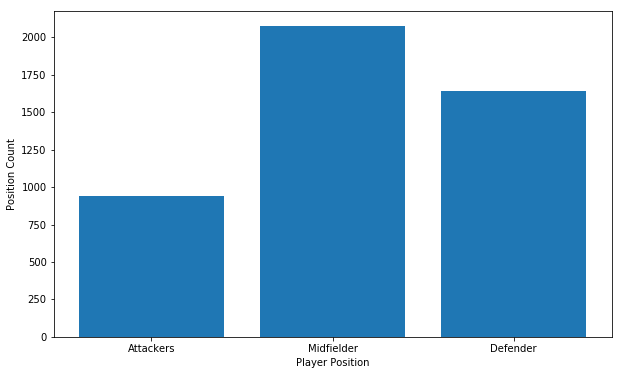

In [15]:
plt.figure(figsize=(10, 6))
labels_x = ['Attackers', 'Midfielder', 'Defender']
plt.bar(labels_x, Position_counts)
plt.xticks(labels_x)
plt.xlabel("Player Position")
plt.ylabel("Position Count")
plt.show()

### Insights:
- The total count of Midfielders is larger than that of Attackers because there are more specified positions for Midfielders.

In [16]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Preferred Foot',
       'Skill Moves', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Value_float', 'Wage_float', 'Release_Clause_float', 'Weight_int',
       'Height_int', 'Preferred_Foot', 'Player_Position'],
      dtype='object')

[Text(0, 0.5, 'Heading Accuracy'), Text(0.5, 0, 'Player Position')]

<Figure size 864x576 with 0 Axes>

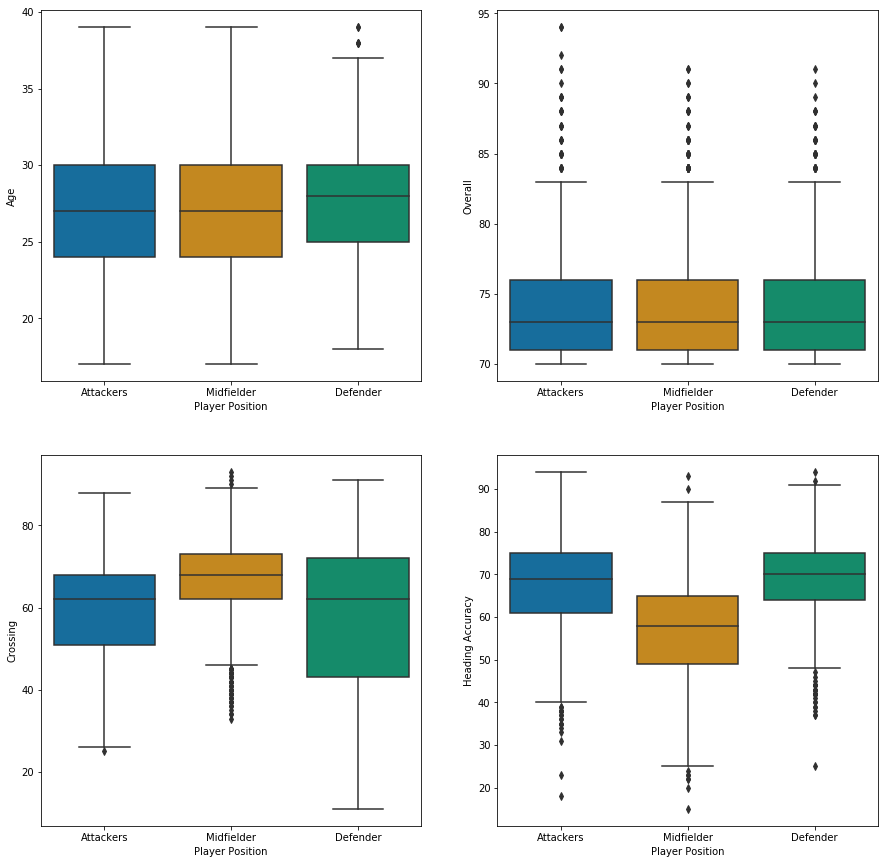

In [17]:
plt.figure(figsize=(12, 8))

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
#sns.despine(left=True)

box_plot1 = sns.boxplot('Player_Position', 'Age', data = df, ax=axes[0, 0], palette='colorblind')
box_plot1.set(xlabel='Player Position', ylabel='Age')

box_plot2 = sns.boxplot('Player_Position', 'Overall', data = df, ax=axes[0, 1], palette='colorblind')
box_plot2.set(xlabel='Player Position', ylabel='Overall')

box_plot3 = sns.boxplot('Player_Position', 'Crossing', data = df, ax=axes[1, 0], palette='colorblind')
box_plot3.set(xlabel='Player Position', ylabel='Crossing')

box_plot4 = sns.boxplot('Player_Position', 'HeadingAccuracy', data = df, ax=axes[1, 1], palette='colorblind')
box_plot4.set(xlabel='Player Position', ylabel='Heading Accuracy')

[Text(0, 0.5, 'Aggression'), Text(0.5, 0, 'Player Position')]

<Figure size 864x576 with 0 Axes>

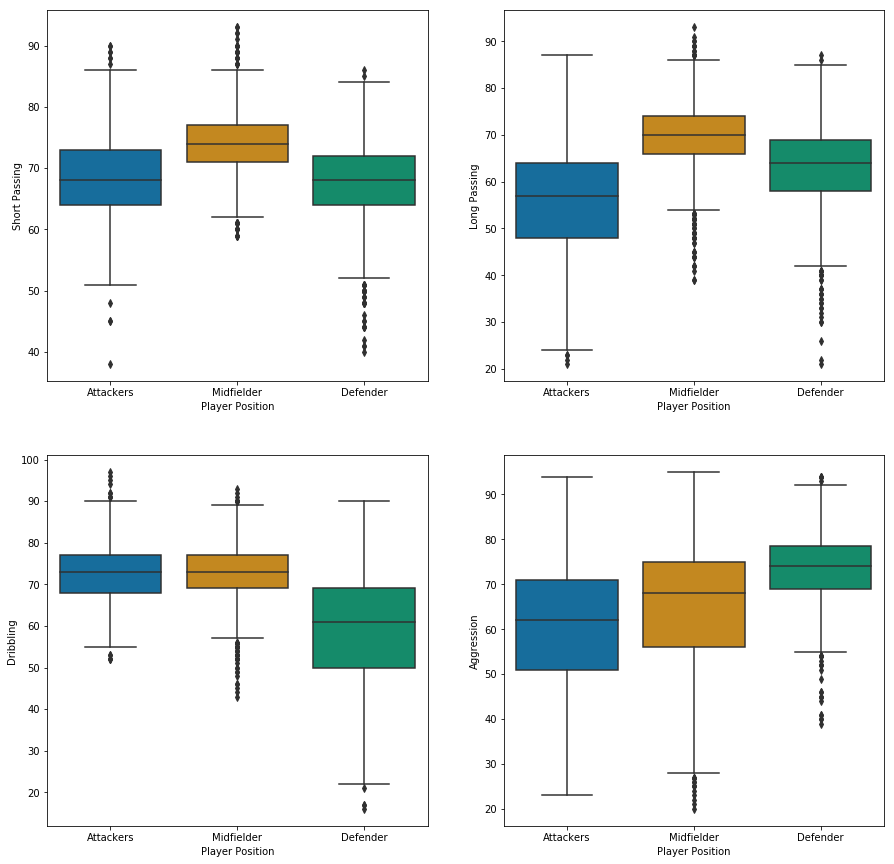

In [18]:
plt.figure(figsize=(12, 8))

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
#sns.despine(left=True)

box_plot5 = sns.boxplot('Player_Position', 'ShortPassing', data = df, ax=axes[0, 0], palette='colorblind')
box_plot5.set(xlabel='Player Position', ylabel='Short Passing')

box_plot6 = sns.boxplot('Player_Position', 'LongPassing', data = df, ax=axes[0, 1], palette='colorblind')
box_plot6.set(xlabel='Player Position', ylabel='Long Passing')

box_plot7 = sns.boxplot('Player_Position', 'Dribbling', data = df, ax=axes[1, 0], palette='colorblind')
box_plot7.set(xlabel='Player Position', ylabel='Dribbling')

box_plot8 = sns.boxplot('Player_Position', 'Aggression', data = df, ax=axes[1, 1], palette='colorblind')
box_plot8.set(xlabel='Player Position', ylabel='Aggression')

[Text(0, 0.5, 'Height'), Text(0.5, 0, 'Player Position')]

<Figure size 864x576 with 0 Axes>

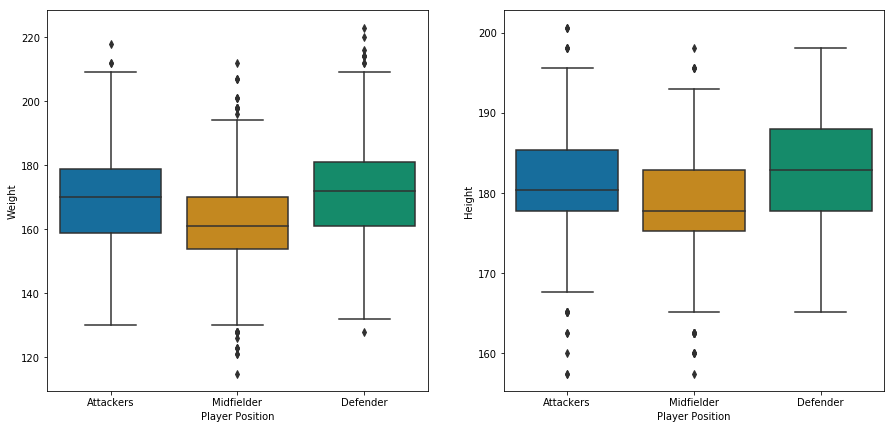

In [19]:
plt.figure(figsize=(12, 8))

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=False)
#sns.despine(left=True)

box_plot9 = sns.boxplot('Player_Position', 'Weight_int', data = df, ax=axes[0], palette='colorblind')
box_plot9.set(xlabel='Player Position', ylabel='Weight')

box_plot10 = sns.boxplot('Player_Position', 'Height_int', data = df, ax=axes[1], palette='colorblind')
box_plot10.set(xlabel='Player Position', ylabel='Height')

### Insights:
- There is no significant difference in Overall Rating among all three positions, excluded from the prediction model 
- Defender has a smaller deviation in Age.
- Midfielder tends to be shorter and lighter since they need to be more flexible in passing and dribbling. Most midfielders take set-pieces and convert them to goals. Hence they have higher FKAccuracy 
- Attackers can score goals by heading the ball. Attackers playing as target man are taller and have higher heading accuracy, good at volleying the ball.
- Defenders are taller as the go to the opposite end during corners and freekicks to score a goal with the head and have higher heading accuracy
- Defenders are heavier as they perform last ditch tackles and they are physically stronger.
- Attackers are slightly heavier and strong as they shield the ball and turn to score during crosses and freekicks
- Attackers(LW, RW) and Midfielders(LM, RM) create goal scoring chances by crossing the ball inside the box, hence they have good crossing ability
- Attackers and some Midfielders are very good at finishing (i.e converting chances to goals) and ball-controlling.
- Midfielders maintain possesion in a game, disposses opposing players and initiate an attack by feeding the ball to attackers. Initiation of an attack requires a lot of passing and so they generally have higher short and long passing skills.
- Attackers and midfielders tend to be agile and are faster as they collect long balls passed through or above defenders.
- Defenders and midfielders have higher pass interception skills in order to gain possession and move the ball forward.
- Defenders and midfielders are good at standing and sliding tackles and marking opposition players as it is their duty to get possession of the ball. 

[Text(0, 0.5, 'Wage'), Text(0.5, 0, 'Player Position')]

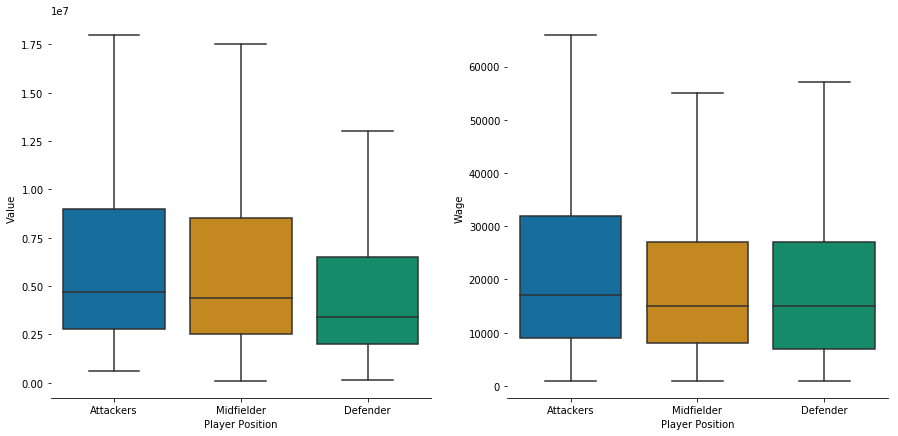

In [20]:
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=False)
sns.despine(left=True)

#sns.boxplot('Player_Position', 'Value_float', data = df, showfliers=False, ax=axes[0, 0])
#sns.boxplot('Player_Position', 'Wage_float', data = df, showfliers=False, ax=axes[0, 1])
#sns.boxplot('Player_Position', 'Release_Clause_float', data = df, showfliers=False, ax=axes[1, 0])

box_plot11 = sns.boxplot('Player_Position', 'Value_float', data = df, showfliers=False, ax=axes[0], palette='colorblind')
box_plot11.set(xlabel='Player Position', ylabel='Value')

box_plot12 = sns.boxplot('Player_Position', 'Wage_float', data = df, showfliers=False, ax=axes[1], palette='colorblind')
box_plot12.set(xlabel='Player Position', ylabel='Wage')

#box_plot13 = sns.boxplot('Player_Position', 'Weight_int', data = df, ax=axes[0], palette='colorblind')
#box_plot13.set(xlabel='Player Position', ylabel='Weight')

### Insights:
- Strikers tend to have higher value, wage, and Release Clause compared to other positions and Defender is the lowest.
- It aligns to a fact that, normally, people care more about attacking but ignore the true value of defending.

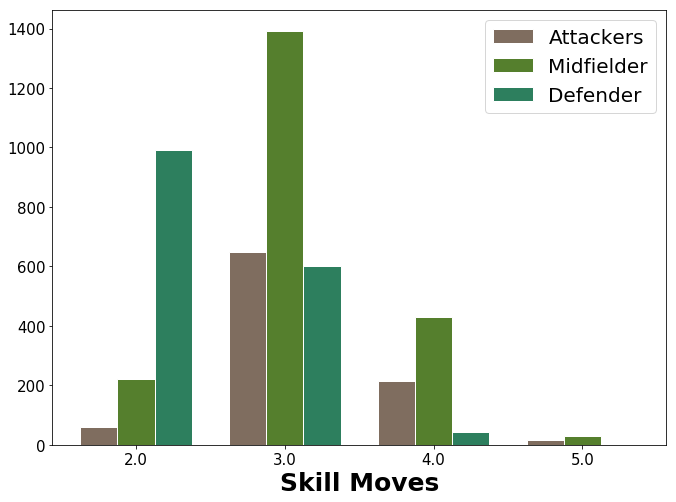

In [21]:
plt.figure(figsize=(11,8))

attr_rec = df[df['Player_Position'] == 'Attackers']
midf_rec = df[df['Player_Position'] == 'Midfielder']
def_rec = df[df['Player_Position'] == 'Defender']

bar_attr = attr_rec["Skill Moves"].value_counts().sort_index().values
bar_midf = midf_rec["Skill Moves"].value_counts().sort_index().values
bar_def = def_rec["Skill Moves"].value_counts().sort_index().values

barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(bar_attr))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bar_attr, color='#7f6d5f', width=barWidth, edgecolor='white', label='Attackers')
plt.bar(r2, bar_midf, color='#557f2d', width=barWidth, edgecolor='white', label='Midfielder')
plt.bar(r3, bar_def, color='#2d7f5e', width=barWidth, edgecolor='white', label='Defender')

# Add xticks on the middle of the group bars
plt.xlabel('Skill Moves', fontweight='bold',  fontsize = 25)
plt.xticks([r + barWidth for r in range(len(bar_attr))], 
           attr_rec["Skill Moves"].value_counts().sort_index().index, fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={'size': 20})
plt.show()

### Insights:
- A skill move is done by the player in order to keep the possession of the ball and go past the opposition players. It can be a flick, spin, chop, fake pass, etc. Defender has a much lower skill move score compared to Strikers and Midfielder, which could be one of the reasons why Defender values less than the other two positions. Since Defender cannot perform eye-catching moves due to their low skills move scores, they cannot show their value in a straight forward way.

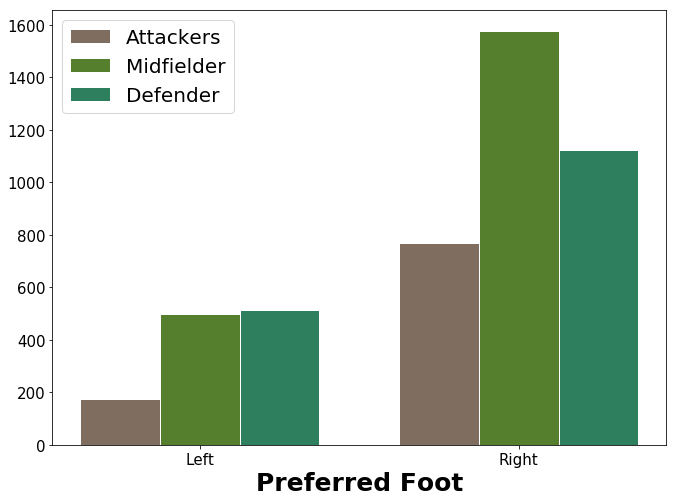

In [22]:
plt.figure(figsize=(11,8))

attr_rec = df[df['Player_Position'] == 'Attackers']
midf_rec = df[df['Player_Position'] == 'Midfielder']
def_rec = df[df['Player_Position'] == 'Defender']

bar_attr = attr_rec['Preferred Foot'].value_counts().sort_index().values
bar_midf = midf_rec['Preferred Foot'].value_counts().sort_index().values
bar_def = def_rec['Preferred Foot'].value_counts().sort_index().values

barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(bar_attr))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bar_attr, color='#7f6d5f', width=barWidth, edgecolor='white', label='Attackers')
plt.bar(r2, bar_midf, color='#557f2d', width=barWidth, edgecolor='white', label='Midfielder')
plt.bar(r3, bar_def, color='#2d7f5e', width=barWidth, edgecolor='white', label='Defender')

# Add xticks on the middle of the group bars
plt.xlabel('Preferred Foot', fontweight='bold',  fontsize = 25)
plt.xticks([r + barWidth for r in range(len(bar_attr))], 
           attr_rec['Preferred Foot'].value_counts().sort_index().index, fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={'size': 20})
plt.show()

### Insights:
- There are more right footed players than left. Compared to Strikers and Midfielder, Defender is more balanced on their foot, even though all three positions are heavily right feet used.

***
## Step 4: Modeling

***
### Splitting the dataset into train and test sets:

In [23]:
cols = ['Age', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Weight_int', 'Height_int', 'Preferred_Foot']


y = ['Player_Position']
x = cols
x_train, x_test, y_train, y_test = train_test_split(df[x], df[y], test_size=0.2) #returns train-test splits of inputs

***
### Model comparing and selecting:

In [24]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
#Common Model Evaluations
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

***
### Machine Learning Algorithm (MLA) Selection and Initialization:

Try different models to see which one provides the best accuracy.

In [25]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.SGDClassifier(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost: 
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y_train[y]

#index through MLA and save performance to table
row_index = 1
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg,x_train[x],  y_train[y], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions 
    alg.fit(x_train[x],  y_train[y])
    MLA_predict[MLA_name] = alg.predict(x_train[x])
    
    row_index+=1

#print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
display(MLA_compare)

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
16,XGBClassifier,0.931468,0.872451,0.0260217,1.30078
4,GradientBoostingClassifier,0.959087,0.872004,0.0229094,2.33768
14,LinearDiscriminantAnalysis,0.868845,0.870304,0.0281434,0.0373172
6,LogisticRegressionCV,0.873679,0.869052,0.0364622,3.50243
8,KNeighborsClassifier,0.896464,0.852594,0.0211561,0.0188209
2,BaggingClassifier,0.990958,0.847406,0.0336909,0.437331
5,RandomForestClassifier,0.992435,0.841682,0.0325119,0.0946881
3,ExtraTreesClassifier,1,0.840161,0.0368911,0.0672352
15,QuadraticDiscriminantAnalysis,0.866831,0.836762,0.0238276,0.0151508
7,SGDClassifier,0.787332,0.787209,0.198396,0.0207881


***
### Grid search for XGBClassifier:

In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from datetime import datetime

***
### Set timer to record the time:

In [27]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

***
### Set a range of values for different parameters:

In [28]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [29]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

***
### Test different combinations:

In [30]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.3min finished



 Time taken: 0 hours 1 minutes and 40.43 seconds.


***
### Print out the best combination of parameters:

In [31]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([ 8.69713394, 18.24557956, 15.83402077, 10.79135203, 14.45820483]), 'std_fit_time': array([0.03796129, 0.08805444, 0.1425662 , 0.21273565, 0.05856918]), 'mean_score_time': array([0.09980281, 0.23568567, 0.23226293, 0.10881305, 0.21884926]), 'std_score_time': array([0.00628503, 0.00113405, 0.02230549, 0.00813325, 0.00183926]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

***
## Step 5: Model evaluation

***
### Accuracy with new parameters:

In [32]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1.5, learning_rate=0.02,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=600, n_jobs=1, nthread=1, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

xgb.fit(df[x],df[y])

y_pred = xgb.predict(x_test)

print('Accuracy of XGBClassifier on test set: {:.2f}'.format(xgb.score(x_test, y_test)))

Accuracy of XGBClassifier on test set: 0.97


***
### Predicting result for a test case:

In [33]:
#Testing the model

'''
Column Headers:
['Age', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Weight_int', 'Height_int', 'Preferred_Foot']
'''
test_case1 = [19, 5.0, 77.0, 88.0, 77.0, 82.0, 78.0, 90.0, 77.0, 63.0, 73.0, 91.0, 96.0, 96.0, 92.0, 87.0, 83.0, 79.0, 75.0, 83.0, 71.0, 78.0, 62.0, 38.0, 88.0, 82.0, 70.0, 86.0, 34.0, 34.0, 32.0, 161, 177.0, 0.0]
dataframe_test_case1 = pd.DataFrame(test_case1).T
dataframe_test_case1.columns = ['Age', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Weight_int', 'Height_int', 'Preferred_Foot']

position_test_case1 = xgb.predict(dataframe_test_case1)
print(position_test_case1)

['Midfielder']
